## General

Your task is to visualize labour / employment data ((https://www150.statcan.gc.ca/n1/daily-quotidien/190308/dq190308a-eng.htm) for Canada by province and industry for the last 5 years which should be pivotable by demographic (age, sex, ethnicity and industry / sector).

Use open skills data and job titles using this link and visualize a mashup correlating skills and jobs to industry and employment and provide a sample for evaluation.

Suggest in detail, how you would train these two data sets over time and what machine learning algorithm you would use to make the data "smarter" over time.


In [244]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## 1- Understanding the data we have


In [245]:
#Importing the given data
job_skills_df = pd.read_csv('job_skills.csv')
industry_df=pd.read_csv('industrybyprovinces.csv')
employment_df=pd.read_csv('employement_age_sex.csv')


In [246]:

job_skills_df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [247]:
industry_df.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Mar-01,Canada,2016A000011124,"Total employed, all industries",Persons,249.0,thousands,3.0,v91414952,1.1,14572.5,NaN,NaN,NaN,1.0
1,Mar-01,Canada,2016A000011124,Goods-producing sector,Persons,249.0,thousands,3.0,v91414953,1.2,3621.5,NaN,NaN,NaN,1.0
2,Mar-01,Canada,2016A000011124,"Agriculture [111-112, 1100, 1151-1152]",Persons,249.0,thousands,3.0,v91414954,1.3,308.8,NaN,NaN,NaN,1.0
3,Mar-01,Canada,2016A000011124,"Forestry, fishing, mining, quarrying, oil and ...",Persons,249.0,thousands,3.0,v91414955,1.4,257.8,NaN,NaN,NaN,1.0
4,Mar-01,Canada,2016A000011124,Utilities [22],Persons,249.0,thousands,3.0,v91414956,1.5,118.8,NaN,NaN,NaN,1.0


In [248]:
employment_df.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2020-06,Canada,2016A000011124,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v2091072,1.3.1.1,17777.8,NaN,NaN,NaN,1
1,2020-07,Canada,2016A000011124,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v2091072,1.3.1.1,18069.6,NaN,NaN,NaN,1
2,2020-08,Canada,2016A000011124,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v2091072,1.3.1.1,18289.5,NaN,NaN,NaN,1
3,2020-09,Canada,2016A000011124,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v2091072,1.3.1.1,18564.5,NaN,NaN,NaN,1
4,2020-10,Canada,2016A000011124,Employment,Both sexes,15 years and over,Persons,249,thousands,3,v2091072,1.3.1.1,18636.9,NaN,NaN,NaN,1


In [249]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      330 non-null    object 
 1   GEO                           330 non-null    object 
 2   DGUID                         330 non-null    object 
 3   Labour force characteristics  330 non-null    object 
 4   Sex                           330 non-null    object 
 5   Age group                     330 non-null    object 
 6   UOM                           330 non-null    object 
 7   UOM_ID                        330 non-null    int64  
 8   SCALAR_FACTOR                 330 non-null    object 
 9   SCALAR_ID                     330 non-null    int64  
 10  VECTOR                        330 non-null    object 
 11  COORDINATE                    330 non-null    object 
 12  VALUE                         330 non-null    float64
 13  STATU

The employment dataframe will need cleaning.  Status, UOM, UOM_id, etc. will not be needed. 

In [250]:
industry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340784 entries, 0 to 340783
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   REF_DATE                                               13502 non-null  object 
 1   GEO                                                    13502 non-null  object 
 2   DGUID                                                  12457 non-null  object 
 3   North American Industry Classification System (NAICS)  13502 non-null  object 
 4   UOM                                                    13502 non-null  object 
 5   UOM_ID                                                 13502 non-null  float64
 6   SCALAR_FACTOR                                          13502 non-null  object 
 7   SCALAR_ID                                              13502 non-null  float64
 8   VECTOR                                      

The industry dataframe will need cleaning.  Status, UOM, UOM_id, etc. will not be needed. 

In [251]:
job_skills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


The job_skills dataframe will not need cleaning. 

## 1.1 - Data cleaning (some data is not useful in our task)

In [252]:
industry_df_cl = industry_df[['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'VALUE', 'SCALAR_FACTOR']] #From original dataframe take the most important ones
industry_df_cl.columns = ['Date', 'Prov', 'Industry', 'Value', 'Scalar factor'] #rename columns
industry_df_cl['Date'] = industry_df_cl['Date'].astype('str')
industry_df_cl['Industry'] = industry_df_cl['Industry'].astype('category')
industry_df_cl['Value'] = industry_df_cl['Value'].astype('float64')
industry_df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340784 entries, 0 to 340783
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           340784 non-null  object  
 1   Prov           13502 non-null   object  
 2   Industry       13502 non-null   category
 3   Value          12745 non-null   float64 
 4   Scalar factor  13502 non-null   object  
dtypes: category(1), float64(1), object(3)
memory usage: 10.7+ MB


In [253]:
industry_df_cl.head()

,Date,Prov,Industry,Value,Scalar factor
0,Mar-01,Canada,"Total employed, all industries",14572.5,thousands
1,Mar-01,Canada,Goods-producing sector,3621.5,thousands
2,Mar-01,Canada,"Agriculture [111-112, 1100, 1151-1152]",308.8,thousands
3,Mar-01,Canada,"Forestry, fishing, mining, quarrying, oil and ...",257.8,thousands
4,Mar-01,Canada,Utilities [22],118.8,thousands


In [254]:
employment_df_cl = employment_df[['REF_DATE','GEO', 'Labour force characteristics','Sex', 'Age group', 'VALUE', 'SCALAR_FACTOR']] 
employment_df_cl.columns = ['Date', 'Prov', 'Char', 'Sex', 'Age', 'Value', 'Scalar Factor']
employment_df_cl['Date'] = employment_df_cl['Date'].astype('str')
employment_df_cl['Prov'] = employment_df_cl['Prov'].astype('category')
employment_df_cl['Char'] = employment_df_cl['Char'].astype('category')
employment_df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           330 non-null    object  
 1   Prov           330 non-null    category
 2   Char           330 non-null    category
 3   Sex            330 non-null    object  
 4   Age            330 non-null    object  
 5   Value          330 non-null    float64 
 6   Scalar Factor  330 non-null    object  
dtypes: category(2), float64(1), object(4)
memory usage: 13.8+ KB


In [255]:
employment_df_cl.head()

,Date,Prov,Char,Sex,Age,Value,Scalar Factor
0,2020-06,Canada,Employment,Both sexes,15 years and over,17777.8,thousands
1,2020-07,Canada,Employment,Both sexes,15 years and over,18069.6,thousands
2,2020-08,Canada,Employment,Both sexes,15 years and over,18289.5,thousands
3,2020-09,Canada,Employment,Both sexes,15 years and over,18564.5,thousands
4,2020-10,Canada,Employment,Both sexes,15 years and over,18636.9,thousands


# 2- Visualization of the cleaned data


## 2.1- Employment by age

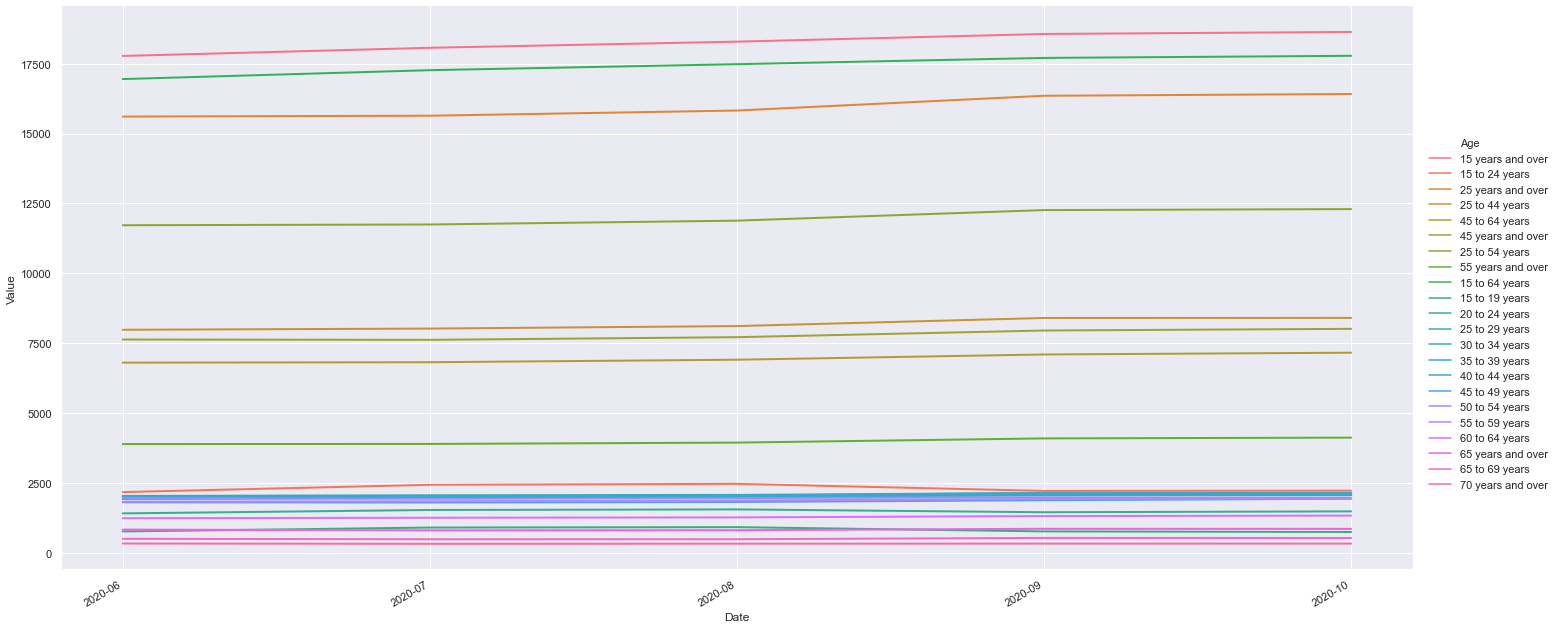

In [256]:
unemployment_rate_province_df= employment_df_cl[(employment_df_cl['Char']=='Employment')&(employment_df_cl['Sex']=='Both sexes')]
# creating a dataframe to represent data we want
g = sns.relplot(x='Date', y='Value', data=unemployment_rate_province_df, hue='Age',
           kind='line', height=10,linewidth=2,aspect=2)
g.fig.autofmt_xdate()


# 2.2- Employment by industry 

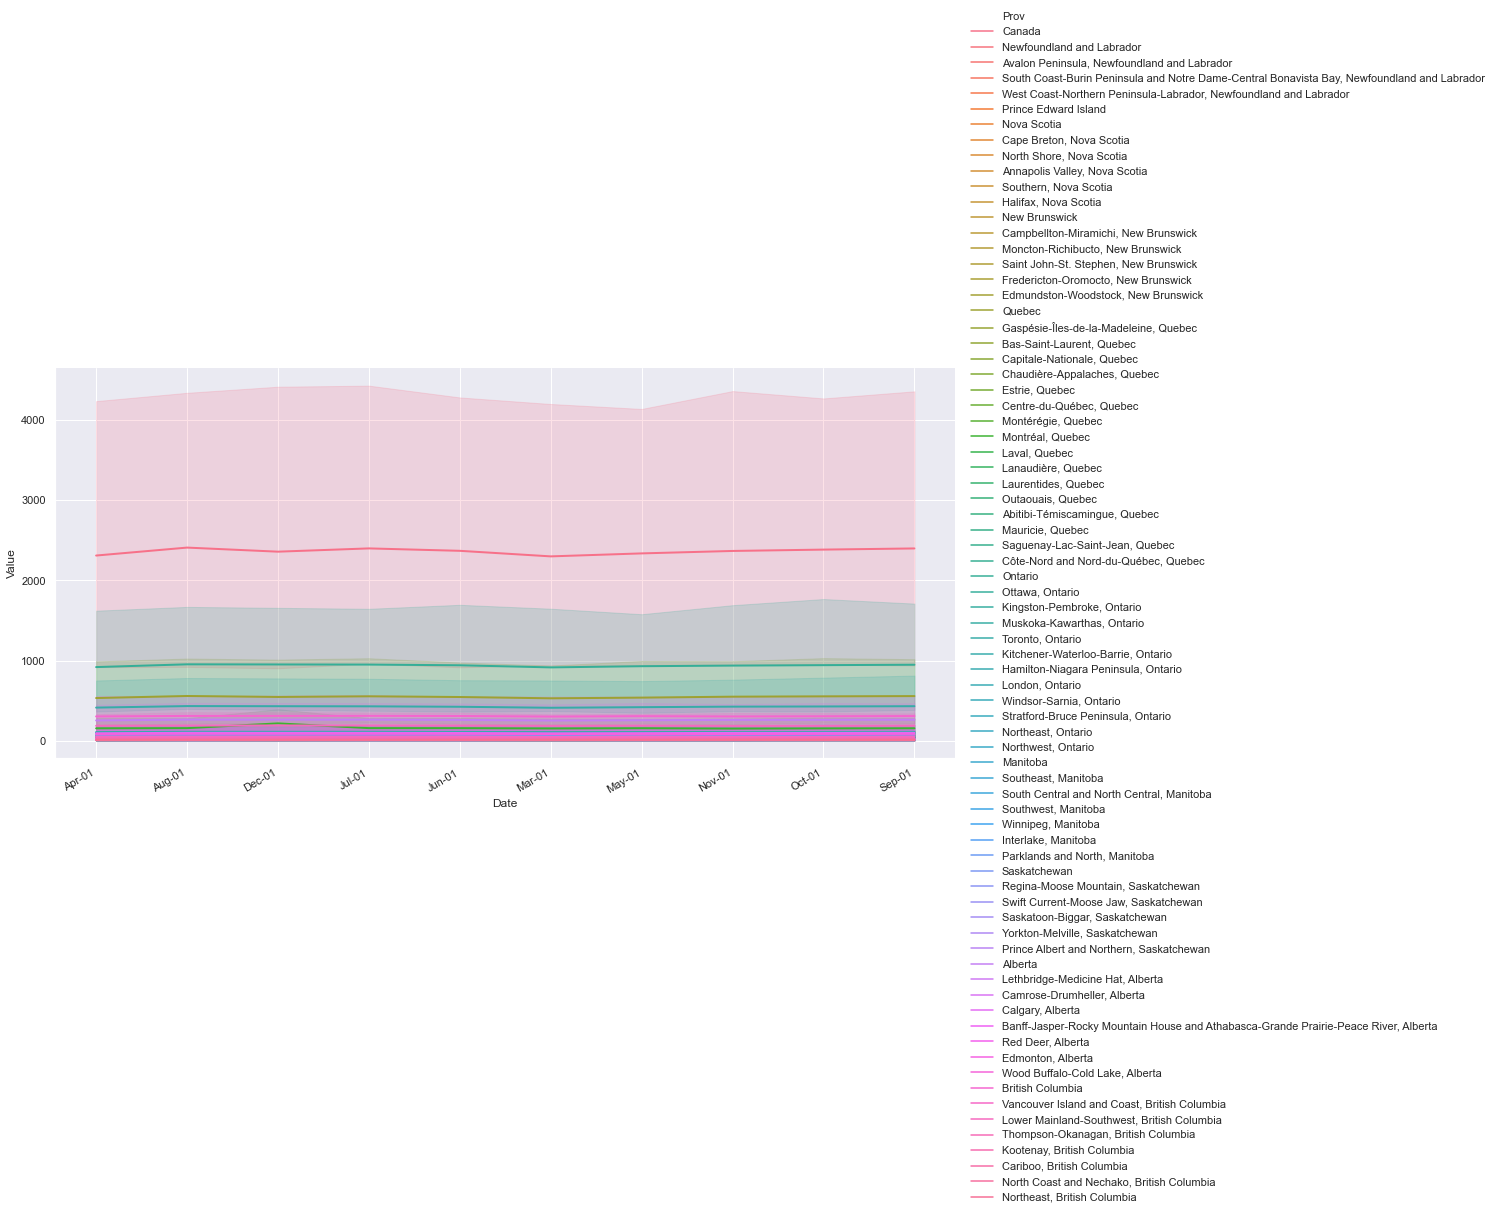

In [338]:

g = sns.relplot(x='Date', y='Value', data=industry_df_cl, hue='Prov',
           kind='line', height=7,linewidth=2,aspect=2)
g.fig.autofmt_xdate()


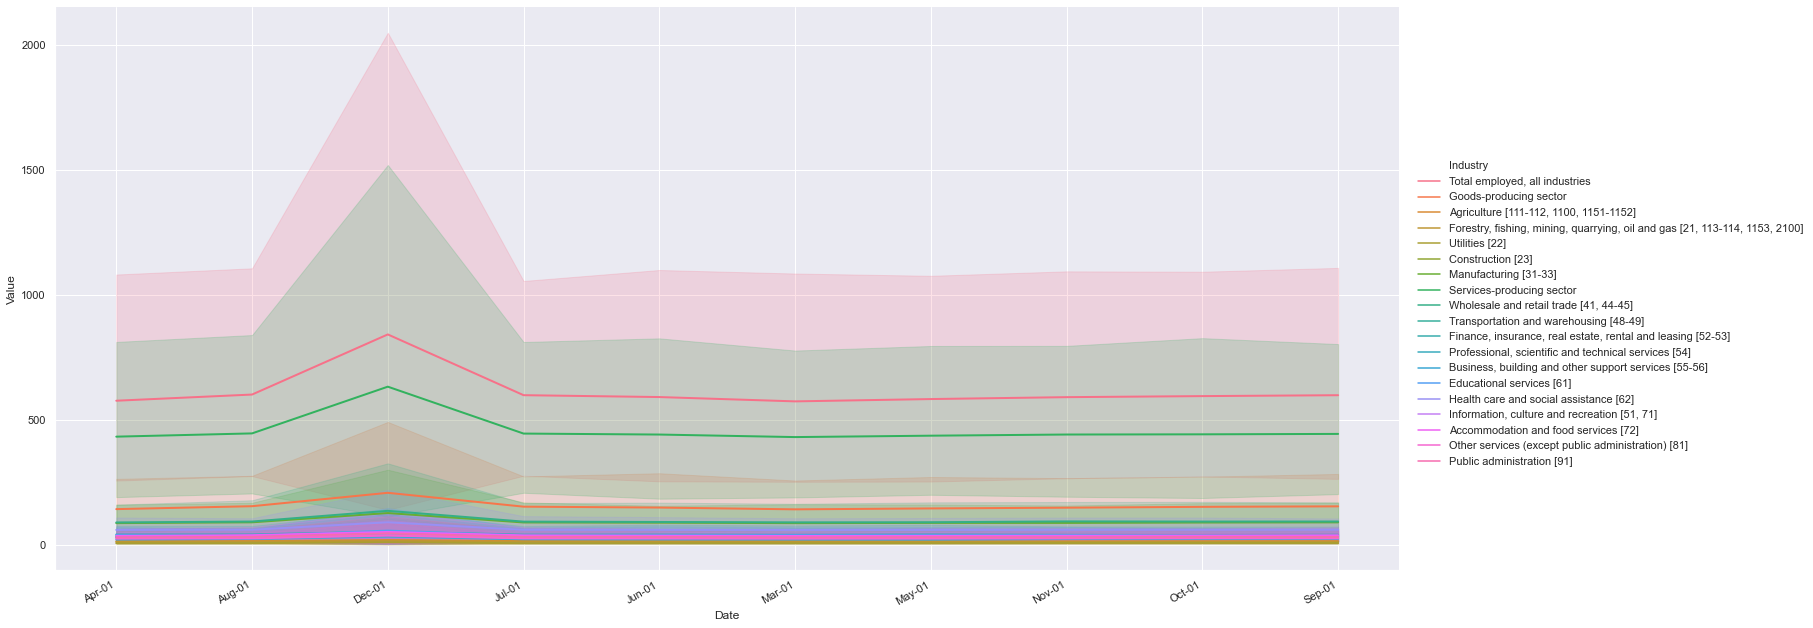

In [257]:
industry_province= industry_df_cl[(industry_df_cl['Prov']=='Calgary')]
# creating a dataframe to represent data we want
plot= sns.relplot(x='Date', y='Value', data=industry_df_cl, hue='Industry', kind='line', height=10,linewidth=2,aspect=2)
plot.fig.autofmt_xdate()


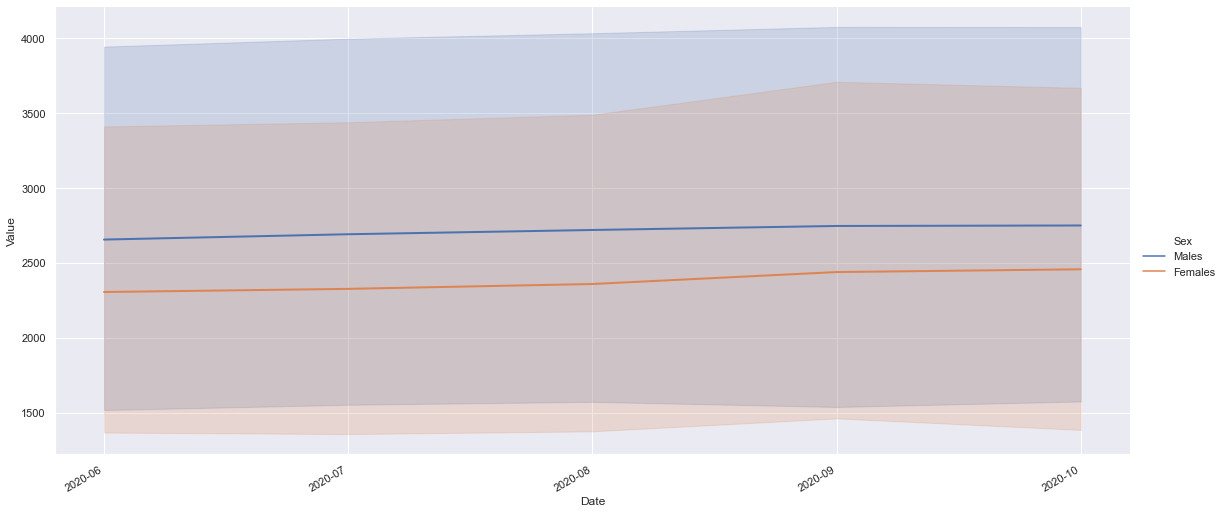

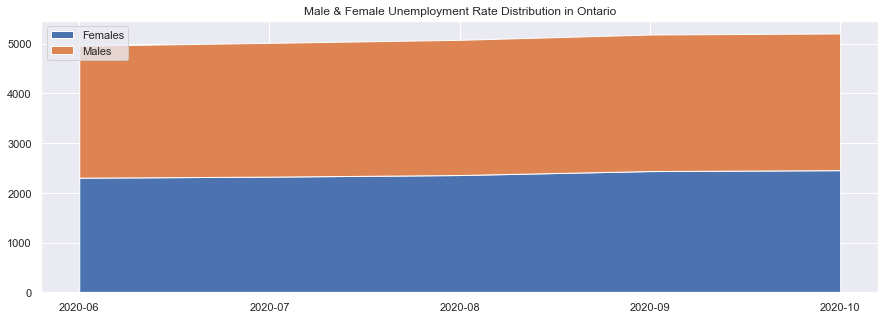

In [347]:
unemp_rate_df = employment_df_cl[(employment_df_cl['Sex']!='Both sexes')]
unemp_rate_df = unemp_rate_df[unemp_rate_df['Prov']=='Canada']
g = sns.relplot(x='Date', y='Value', data=unemp_rate_df, hue='Sex',
           kind='line', height=8,linewidth=2,aspect=2)
g.fig.autofmt_xdate() 
g.set_titles('Male & Female Unemployment Rate Distribution in Canada')

unemp_rate_df = unemp_rate_df.pivot_table(index='Sex', columns='Date').Value
labels = ['Females', 'Males']
x = unemp_rate_df.columns.tolist()
plt.figure(figsize=(15, 5))
plt.stackplot(x, unemp_rate_df.loc['Females'], unemp_rate_df.loc['Males'], labels=labels)
plt.legend(loc = 'upper left')

plt.title('Male & Female Unemployment Rate Distribution in Ontario')
plt.show()


# 2.3- Job skills by industry

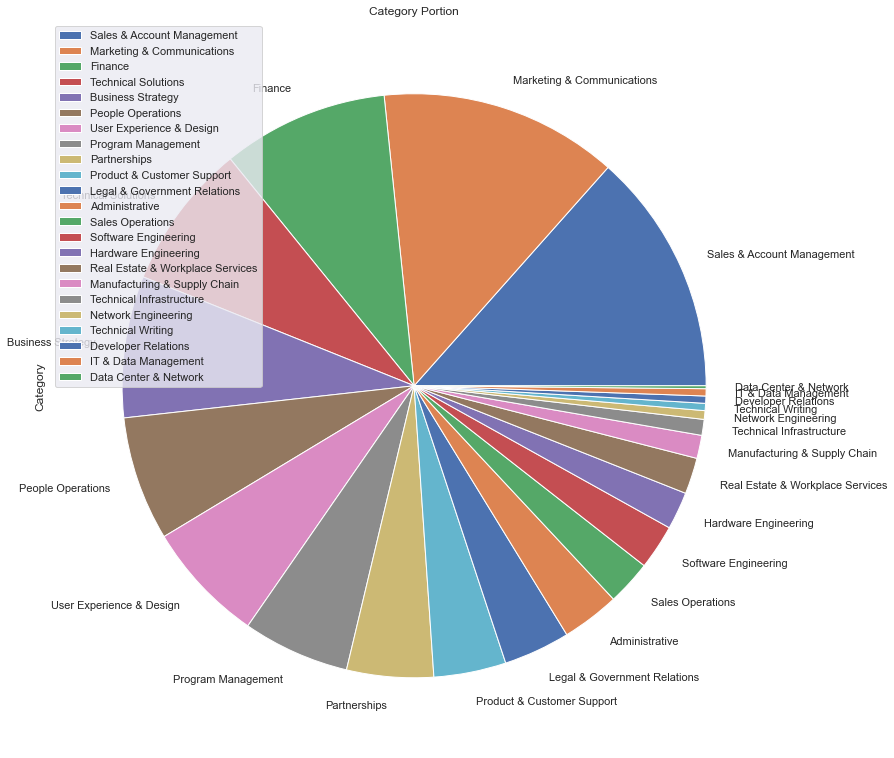

In [258]:
job_skills_df.Category.value_counts().to_frame().plot.pie(y='Category', figsize=(13, 13), title='Category Portion')
plt.subplots_adjust(left=0.0, bottom=0.1, right=1)


# 2.4- Location of jobs

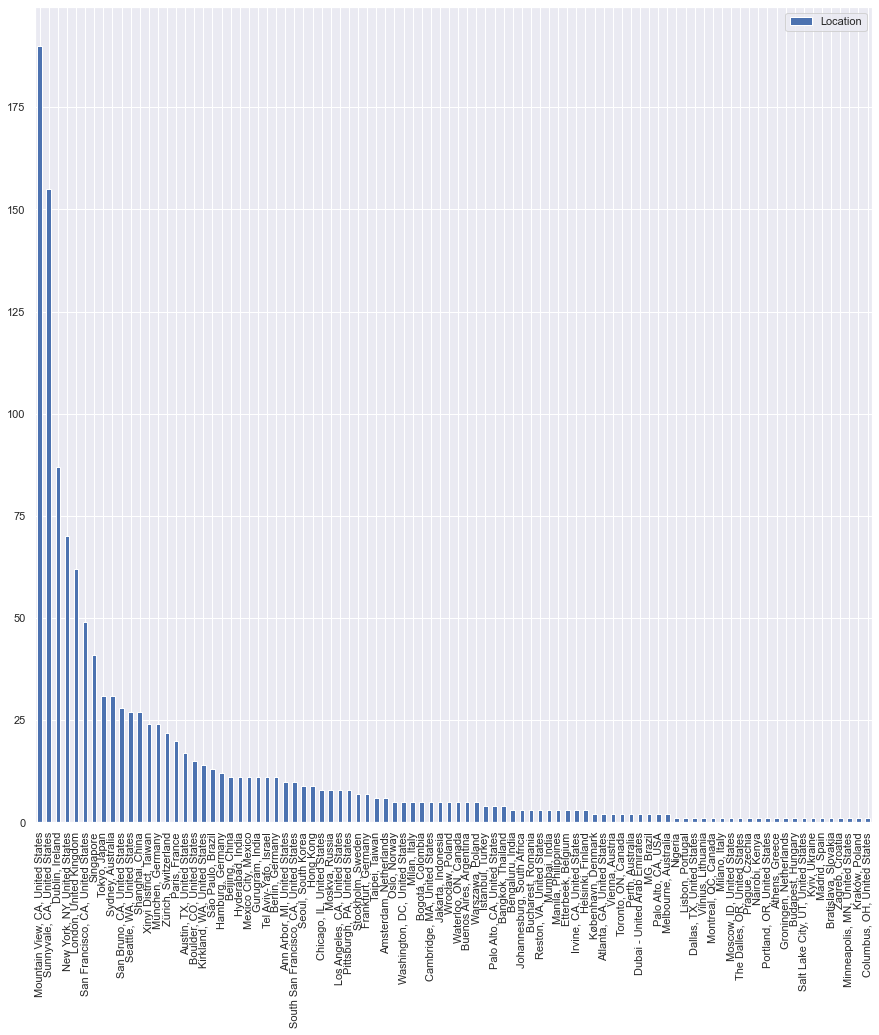

In [297]:

job_skills_df.Location.value_counts().to_frame().plot.bar(y='Location', figsize=(15, 15))


In [315]:
job_skills_df.describe() # brief description of our jobs and skills dataframe


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1227,35,168,190,33,32,32


# 2.5- Using Pandas Pivot Tables

In [324]:
pd.pivot_table(job_skills_df, 'Category', ['Company', 'Title'],aggfunc='first')


Category
Company Title                                                                               
Google  APAC Accounting Lead, Non-Ads Products                                       Finance
        APAC Manager, Employment Tax                                                 Finance
        APAC SMB Account Manager, Google Cloud (Mandari...        Sales & Account Management
        AR and VR Writer                                          Marketing & Communications
        ASIC Physical Design Engineering Tech Lead & Ma...              Hardware Engineering
...                                                                                      ...
YouTube Quality Program Manager, Global Vendor Operatio...        Product & Customer Support
        Real Estate and Workplace Services (REWS) Busin...  Real Estate & Workplace Services
        Residual Manager, YouTube Originals                                          Finance
        Risk Advisor, YouTube                                                        Finance
        Scaled Abuse Analyst, YouTube                                      Business Strategy

[794 rows x 1 columns]

In [327]:
pd.pivot_table(industry_df_cl, 'Industry', ['Value', 'Date'],aggfunc='first')


Industry
Value   Date                                          
0.2     Aug-01                          Utilities [22]
        Dec-01                          Utilities [22]
0.5     Apr-01                          Utilities [22]
        Aug-01  Agriculture [111-112, 1100, 1151-1152]
        Dec-01  Agriculture [111-112, 1100, 1151-1152]
...                                                ...
15011.9 Jun-01          Total employed, all industries
15108.6 Oct-01          Total employed, all industries
15200.1 Sep-01          Total employed, all industries
15203.1 Jul-01          Total employed, all industries
15267.2 Aug-01          Total employed, all industries

[5712 rows x 1 columns]

# 3- Machine Learning

It was mentioned in the task to **suggest** how a machine would get learn and get smarter over time. Here is what I would do: 



In order, the steps required to be able to train and test the data are:

- Preprocessing of the data: StandardScaler(), Dimensionality Reduction
- Using the dataframes, put them together into one feature matrix. 
- Determine your target vector(what you want to predict) and assign it to y, while X should be the feature matrix. 
- Split the data into training and test datasets using train_test_split.
- Using cross valdation,evaluate model performance using cross validation. Models you would choose should be LinearRegression, Lasso, RandomForestRegressor, SVR, DecisionTreeRegressor, and Ridge Regressor.(As this is clearly not a classification problem)
- Once you have your best scores, you can use a gridsearchCV to find the best hyperparameters. 


Finally, we have our final model. Like most models, this model will degrade over time, a concept called Model Drift.

For that reason it’s imperative that practitioners prepare for degraded performance by setting up ML-specific monitoring solutions and workflows to enable model retraining. One way is to set up automated retraining pipelines. An example is IBM, which has its own IBM Watson Data Platform. 
